In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

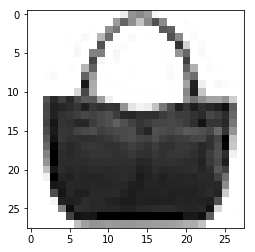

8


((28, 28), ())

In [3]:
exampleindex = 100
fashionimage = x_train[exampleindex]
fashionlabel = y_train[exampleindex]

plt.imshow(fashionimage, cmap=plt.cm.binary)
plt.show()
print(fashionlabel)
fashionimage.shape, fashionlabel.shape

In [4]:
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0
x_train.shape, x_test.shape
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(4, input_shape=(28*28,)))
model.add(keras.layers.Dense(3))
model.add(keras.layers.Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 4)                 3140      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 4         
Total params: 3,159
Trainable params: 3,159
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='sgd', loss='mse')

hist = model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 1s 17us/step - loss: nan
Epoch 2/5
60000/60000 [==============================] - 1s 16us/step - loss: nan
Epoch 3/5
60000/60000 [==============================] - 1s 16us/step - loss: nan
Epoch 4/5
60000/60000 [==============================] - 1s 16us/step - loss: nan
Epoch 5/5
60000/60000 [==============================] - 1s 16us/step - loss: nan


In [7]:
preds = model.predict(x_test)
preds.shape

(10000, 1)

In [8]:
import matplotlib.pyplot as plt

plt.plot(y_test, preds, 'ro')
plt.plot([0,10], [0,10], 'b')

In [9]:
print(np.sum(np.round(preds[:,0]) == y_test) / len(y_test))

0.3599


In [12]:
x_test = x_test.reshape(-1, 28, 28).astype('float32') * 255.0
x_test.shape

(10000, 28, 28)

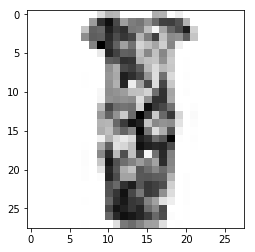

[2.992371]


In [16]:
exampleindex1 = 100
fashionimage_test = x_test[exampleindex1]
fashionlabel_pred = preds[exampleindex1]

plt.imshow(fashionimage_test, cmap=plt.cm.binary)
plt.show()
print(fashionlabel_pred)